# Actividad: Análisis exploratorio con técnicas de agrupamiento
**Joel Isaias Solano Ocampo | A01639289**



---


Descarga el conjunto de datos socioeconómicos de los países del mundo, y haz lo siguiente:

In [153]:
!pip install sklearn-som

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_som.som import SOM
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering, OPTICS, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, pairwise_distances

In [134]:
df = pd.DataFrame(pd.read_csv('/content/Country-data.csv'))
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [135]:
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df['country'].head()

0    0
1    1
2    2
3    3
4    4
Name: country, dtype: int64

In [136]:
x = df.drop('country', axis=1).values
y = df['country'].values

1. Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.

In [137]:
####### Helper funtion for plotting #######
def plot_data(points, labels, title):
    fig = plt.figure()
    if points.shape[1] > 2:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='magma')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='magma')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)

    plt.show()

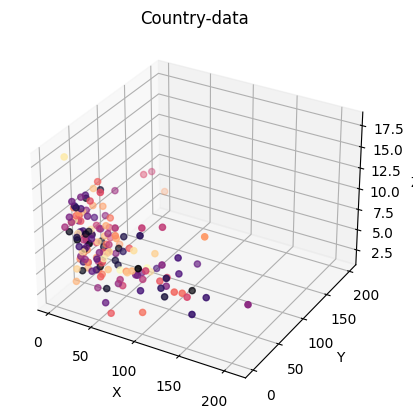

In [138]:
####### Create plot_data #######
points = x
labels = y
plot_data(points, labels, 'Country-data')

----- K-means -----
Labels:  [3 0 0 3 7 7 0 1 1 0 8 5 3 7 7 1 0 3 3 3 0 0 7 4 0 3 3 3 3 1 3 3 3 7 0 0 3
 3 3 0 3 7 8 8 1 0 0 0 0 5 3 7 0 1 1 7 3 0 1 3 8 0 0 3 3 3 3 7 1 3 0 7 0 1
 8 1 0 1 0 7 3 3 4 3 3 7 7 3 3 7 7 9 0 3 3 7 0 3 8 3 7 3 3 0 0 3 3 3 0 3 1
 8 3 3 6 5 3 7 0 0 3 7 8 2 7 7 3 3 5 3 0 7 3 4 7 8 3 0 8 8 0 0 3 0 1 6 3 3
 0 3 3 3 0 7 0 3 0 4 1 1 7 3 3 7 3 3 3]
Centers:  [[2.36589744e+01 3.88666667e+01 6.49205128e+00 4.45871795e+01
  1.03005128e+04 7.63256410e+00 7.21076923e+01 2.35025641e+00
  4.82846154e+03]
 [4.29375000e+00 4.31437500e+01 1.07662500e+01 4.01312500e+01
  4.11250000e+04 1.09125000e+00 8.08062500e+01 1.79625000e+00
  4.61125000e+04]
 [9.00000000e+00 6.23000000e+01 1.81000000e+00 2.38000000e+01
  1.25000000e+05 6.98000000e+00 7.95000000e+01 2.07000000e+00
  7.03000000e+04]
 [7.69451613e+01 2.86257903e+01 6.20467742e+00 4.61946113e+01
  2.84424194e+03 1.02646129e+01 6.23225806e+01 4.41209677e+00
  1.30941935e+03]
 [8.17500000e+00 1.02950000e+02 3.27250000e+00 7.4000

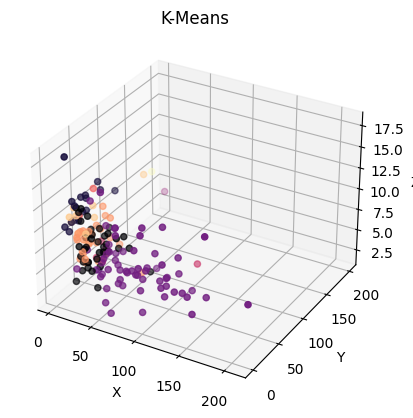

In [139]:
####### K-means #######
print('----- K-means -----')

kmeans = KMeans(n_clusters=10, n_init=10).fit(points)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_

print('Labels: ', clustering_labels)
print('Centers: ', centers)

plot_data(points, clustering_labels, 'K-Means')

In [140]:
# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k, n_init=10).fit(points)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(points, kmeans.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(points, kmeans.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, kmeans.labels_))

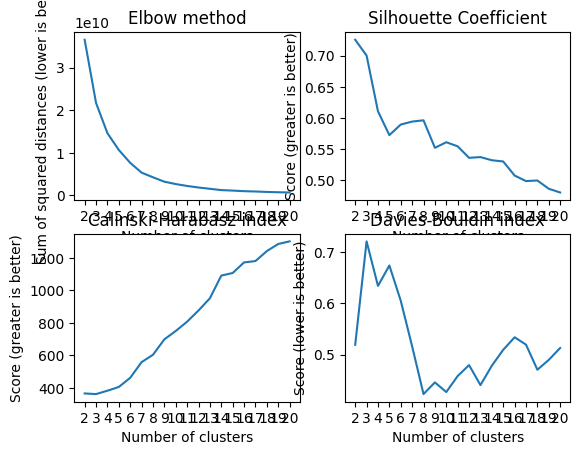

In [141]:
fig, axs = plt.subplots(2, 2)

axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('Number of clusters')
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)

axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (greater is better)')
axs[0][1].set_title('Silhouette Coefficient')
axs[0][1].set_xticks(ks)

axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')
axs[1][0].set_title('Calinski-Harabasz index')
axs[1][0].set_xticks(ks)

axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')
axs[1][1].set_title('Davies-Bouldin index')
axs[1][1].set_xticks(ks)

plt.show()

2. Repita lo anterior, pero con otro método de agrupamiento que elijas.

In [142]:
####### Helper funtion for plotting #######
def plot_data(points, labels, title):
    fig = plt.figure()
    if points.shape[1] > 2:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='plasma')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='plasma')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)

    plt.show()

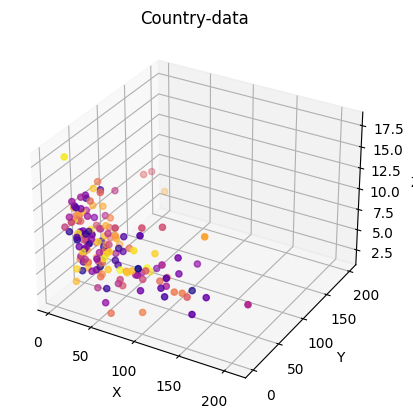

In [143]:
####### Create plot_data #######
points = x
labels = y
plot_data(points, labels, 'Country-data')

----- Dendrogram plot -----


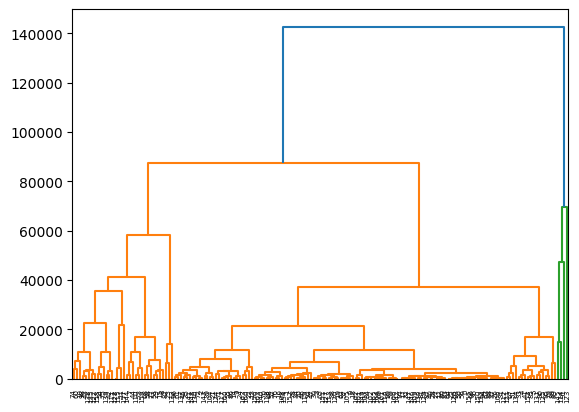

In [160]:
####### Dendrogram plot #######
print('----- Dendrogram plot -----')

linked = linkage(points, 'complete')

plt.figure()
dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.show()

----- Aglomerative clustering -----
Labels:  [2 2 2 2 3 3 2 0 0 2 3 3 2 3 2 0 2 2 2 2 2 2 3 0 2 2 2 2 2 0 2 2 2 3 2 2 2
 2 2 2 2 3 3 3 0 2 2 2 2 3 2 3 2 0 0 2 2 2 0 2 3 2 2 2 2 2 2 3 0 2 2 2 2 0
 3 0 2 0 2 3 2 2 0 2 2 3 2 2 2 3 3 1 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 0
 3 2 2 1 3 2 2 2 2 2 3 3 1 2 3 2 2 3 2 2 3 2 0 3 3 2 2 3 3 2 2 2 2 0 1 2 2
 2 2 2 2 2 3 2 2 2 0 0 0 3 2 2 3 2 2 2]


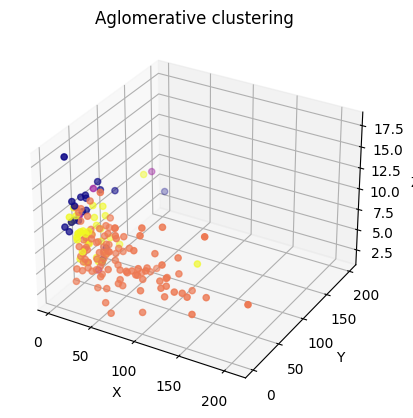

In [162]:
####### Aglomerative clustering #######
print('----- Aglomerative clustering -----')
agl = AgglomerativeClustering(n_clusters=4).fit(points)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'Aglomerative clustering')

Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 4 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]


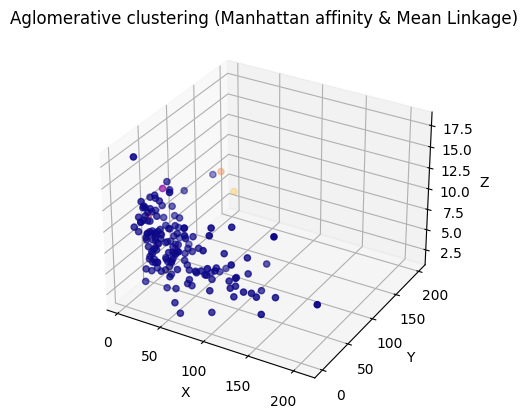

In [146]:
# Aglomerative clustering with single linkage
agl = AgglomerativeClustering(n_clusters=8, linkage = 'single').fit(points)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'Aglomerative clustering (Manhattan affinity & Mean Linkage)')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Labels:  [3 3 3 3 3 3 3 6 6 3 0 0 3 3 3 6 3 3 3 3 3 3 3 2 3 3 3 3 3 6 3 3 3 3 3 3 3
 3 3 3 3 3 0 0 6 3 3 3 3 0 3 3 3 6 6 3 3 3 6 3 0 3 3 3 3 3 3 3 6 3 3 3 3 6
 0 6 3 6 3 3 3 3 2 3 3 3 3 3 3 0 3 4 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 6
 0 3 3 1 0 3 3 3 3 3 3 0 5 3 3 3 3 0 3 3 3 3 2 0 0 3 3 0 0 3 3 3 3 6 1 3 3
 3 3 3 3 3 3 3 3 3 7 6 6 3 3 3 3 3 3 3]


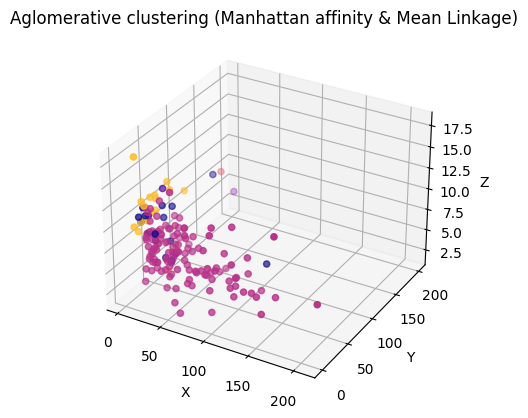

In [147]:
# Using custom distance matrix
dist = pairwise_distances(points, metric = 'l1')
agl = AgglomerativeClustering(n_clusters=8, linkage = 'average', affinity = 'precomputed').fit(dist)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'Aglomerative clustering (Manhattan affinity & Mean Linkage)')

----- OPTICS -----
Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


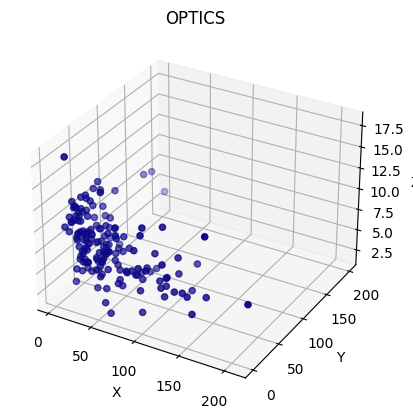

In [148]:
####### OPTICS #######
print('----- OPTICS -----')
optics = OPTICS(min_samples = 20).fit(points)
clustering_labels = optics.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'OPTICS')

----- DBSCAN -----
Labels:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


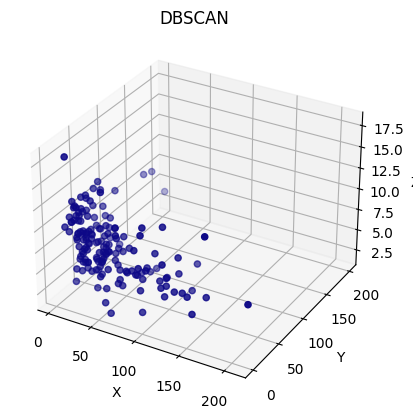

In [149]:
####### DBSCAN #######
print('----- DBSCAN -----')
dbscan = DBSCAN(eps=1.5).fit(points)
clustering_labels = dbscan.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'DBSCAN')

----- Spectral clustering -----
Labels:  [0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 3 0 0 0 3 0 0 0 0 0 0 2 0 3 3 3 0 0
 0 0 0 0 0 0 0 1 0 2 3 1 2 0 0 3 2 1 3 0 2 0 1 0 2 0 0 1 0 0 1 0 0 4 2 1 0
 1 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 2 0 0 1 0 2 0 0 0 0 0 3 0 1 0 0 0 1 0 0
 0 0 2 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 3 0 0 0 2 1 1 0 1 0
 0 1 3 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


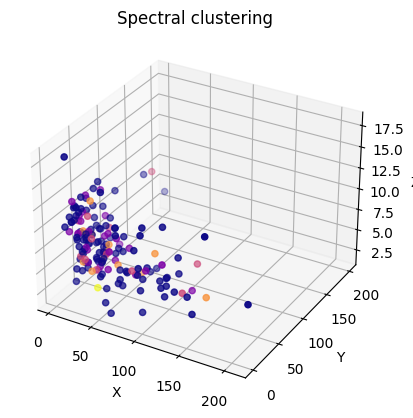

In [150]:
####### Spectral clustering #######
print('----- Spectral clustering -----')
spectral = SpectralClustering(n_clusters=5).fit(points)
clustering_labels = spectral.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'Spectral clustering')

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Labels:  [3 0 1 1 1 1 2 2 3 4 1 0 1 0 1 3 3 1 1 2 1 1 2 2 3 0 1 1 1 1 2 0 1 1 1 1 1
 0 2 4 1 0 4 1 1 1 3 2 1 1 2 0 1 1 0 1 2 1 1 3 3 1 1 1 4 1 1 1 2 0 1 1 1 2
 1 1 1 1 3 1 1 2 2 1 1 2 3 2 3 0 3 1 1 3 3 1 3 1 3 2 1 4 3 1 1 2 4 1 1 1 0
 1 1 3 0 2 2 1 1 1 1 0 1 3 0 4 1 1 1 1 4 1 1 2 1 3 2 2 3 1 4 3 0 3 1 1 3 2
 0 1 0 1 3 3 2 1 2 1 3 1 3 1 1 0 1 1 2]


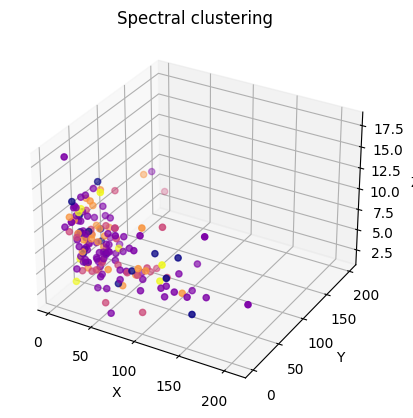

In [151]:
# Using custom affinity matrix
dist = pairwise_distances(points, metric = 'manhattan')
similarity = np.exp(- dist ** 2)

spectral = SpectralClustering(n_clusters=5, affinity = 'precomputed').fit(similarity)
clustering_labels = spectral.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'Spectral clustering')

3. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio. Algunos ejemplos de librerías son:
* Minosom.
* sklearn-som.

In [156]:
data_som = SOM(m=167, n=1, dim=9)
data_som.fit(points)
predictions = data_som.predict(points)

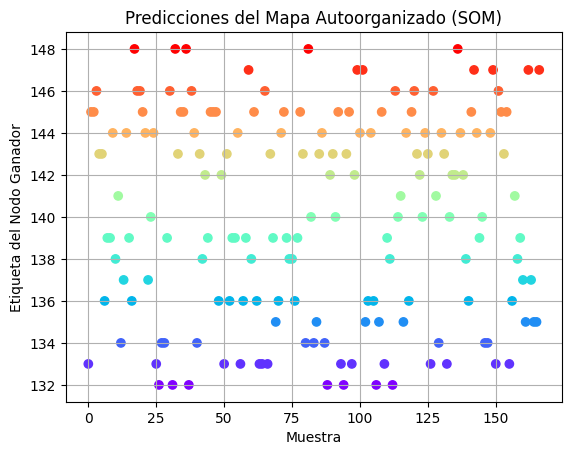

In [159]:
plt.scatter(range(len(predictions)), predictions, c=predictions, cmap='rainbow')
plt.title('Predicciones del Mapa Autoorganizado (SOM)')
plt.xlabel('Muestra')
plt.ylabel('Etiqueta del Nodo Ganador')
plt.grid()
plt.show()

4. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

Empezando con Kmeans, podemos ver que al momento de aplicar clusters a nuestra clasificacion, en nuestro mapeo podemos notar labels que solo llegan a valores maximos a 9 y que dichos labels no son la gran mayoria de los mismos, teniendo en cuenta que el numero  de clusters que se uso fueron de 10 en total. Podemos argumentar aqui que disminuyendo el numero de clusters a un numero optimo como 8 podria mejorar el rendimiento de la clasificacion y asi descartar los pocos casos donde el label fue de 9 para posiblemente cambiarlo a uno mas adoc. De todas formas, el metodo Elbow fue muy efectivo, el coeficiente de Silhouette fue pobre, Calinski-Harabasz index tuvo igualmente un buen coportamiento y Davies-Bouldin index demostro lo que se argumento anteriormente. Estos metodos son a base del numero de clusters prescisamente, lo que nos indican buenos parametros para interpretar kmeans para clasificar los datos. De los demas metodos que se probaron, quize probar todos para ver como se comportaban los datos clasificados con diferentes numeros de clusters y como podria intrepretarlos. Mi conclusion, la misma que kmeans, algunos necesitaron de mas clusters para ser mas explicativos o informativos, algunos sobraron de los mismos y hubo otros cuyo mapeo resulto obsoleto para nuestros datos como en el caso de DBSCAN. La Predicciones del Mapa Autoorganizado (SOM) sirve bastante para detectar nodos ganadores en nuestra muestra de datos,  es decir, nuestra variabe predictora.